In [1]:
import pyzx
from pyzx.circuit.qasmparser import QASMParser

In [2]:
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
x qr[1];
z qr[0];
sdg qr[1];
h qr[1];
cx qr[1],qr[0];
cx qr[0],qr[1];
sdg qr[0];
h qr[0];
"""
print(qasm)


OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
x qr[1];
z qr[0];
sdg qr[1];
h qr[1];
cx qr[1],qr[0];
cx qr[0],qr[1];
sdg qr[0];
h qr[0];



In [3]:
p = QASMParser()
circ = p.parse(qasm)
print(circ.__dict__)

{'qubits': 2, 'gates': [NOT(1), Z(0), S*(1), HAD(1), CNOT(1,0), CNOT(0,1), S*(0), HAD(0)], 'name': ''}


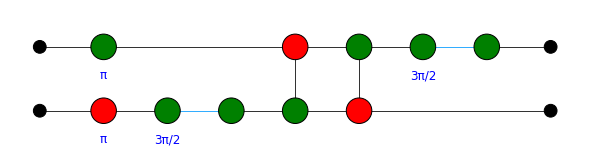

In [4]:
g = circ.to_graph()
pyzx.draw(g)

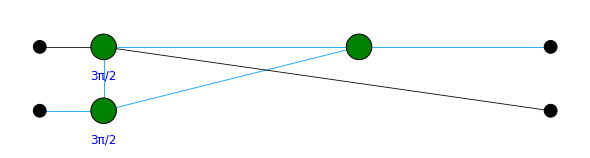

In [5]:
pyzx.full_reduce(g)
pyzx.draw(g)

In [6]:
new_circ = pyzx.extract.streaming_extract(g)
new_circ = pyzx.optimize.basic_optimization(new_circ.to_basic_gates())
print(new_circ.__dict__)

{'qubits': 2, 'gates': [CZ(0,1), HAD(1), S*(1), CNOT(0,1), CNOT(1,0), CNOT(0,1)], 'name': ''}


In [7]:
assert(pyzx.compare_tensors(circ, new_circ, False))